# Extract analysis results and perfrom verifications

This script reads out specified values form the result dict of each structure of a samiling iteration and saves the results in a df.

From the read out strains and stresses calculate the minimum structural safety $\eta$ ("Erfüllungsgrad") for each structure.

Then the calculated verification results and the corresponding bridge parameter are saved in an data frame.

In [1]:
#import packages
import pickle
import pandas as pd
import os
import json 

In [2]:
# import verification functions
from verification import calc_eta

In [4]:
# Eingabe
idx_s=1
start_id = 0
end_id = 0
step='step_4'

df_res= calc_eta(idx_s, start_id, end_id, step, extract_from ='results', folder_name='CFBData', verbalise=False)

There were 0 Structured that resulted in an error during analysis. (Error IDs: [])


In [5]:
df_res

,eta_min_s,x_s,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c,ID
0,3.508709,225.948547,2506.003662,-352.941162,eta_1_x,0,3.364681,225.948547,1975.996216,-352.941162,eta_3_top,0,0


In [6]:
#saving
folder_name='CFBData'
current_directory = os.getcwd()
folder_path = os.path.join(current_directory, folder_name)
filepath=folder_path+'\\{}_Batch\\{}_CFB_evaluations.csv'.format(idx_s,idx_s)

df_res.to_csv(filepath,index=True)

In [7]:
#merge x and y df and save them too
current_directory = os.getcwd()

y_file_name='CFBData\\{}_Batch\\{}_CFB_evaluations.csv'.format(idx_s,idx_s)
y_file_path = os.path.join(current_directory, y_file_name)
df_y=pd.read_csv(y_file_path).drop(columns=['Unnamed: 0'])

x_file_name='CFBData\\{}_Batch\\{}_CFBSamples.csv'.format(idx_s,idx_s)
x_file_path = os.path.join(current_directory, x_file_name)
df_x=pd.read_csv(x_file_path).rename(columns={'Unnamed: 0':'ID'})

df_xy = pd.merge(df_x, df_y, on='ID', how='inner')

filepath=folder_path+'\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)
df_xy.to_csv(filepath,index=True)

df_xy

,ID,L,b1,t_p,t_w,h_w,alpha_l,h_v,l_v,oo,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,5800,9720,400,400,2580,90,0,0,30,...,2506.003662,-352.941162,eta_1_x,0,3.364681,225.948547,1975.996216,-352.941162,eta_3_top,0


## Plotting Runtimes

In [66]:
#saving runtimes
n_elements1=[2450.0, 1601.0, 1142.0, 947.0,  947.0, 947.0, 947.0, 947.0, 947.0, 947.0]
analysis_time1=[1052.815,1011.080,649.90,633.543,632.563,637.594,641.200, 650.680, 650.564, 662.114] #seconds
analysis_time1 = [element / 60 for element in analysis_time1] #minutes

n_elements2= [362.0, 257.0,  206.0, 128.0, 128.0, 128.0,  128.0, 128.0,  128.0, 128.]
analysis_time2=[83.119,92.788 ,102.771,84.002,88.768 ,82.442,85.991,87.115, 84.954, 84.954]
analysis_time2 = [element / 60 for element in analysis_time2] #minutes

n_elements3=[2756.0, 1835.0, 1232.0, 1028.0, 1028.0, 1028.0, 1028.0, 1028.0, 1028.0, 1028.0]
analysis_time3=[1107.244,911.303, 570.685, 602.179, 594.138, 591.931, 593.499, 606.966, 603.610, 600.916]
analysis_time3 = [element / 60 for element in analysis_time3] #minutes


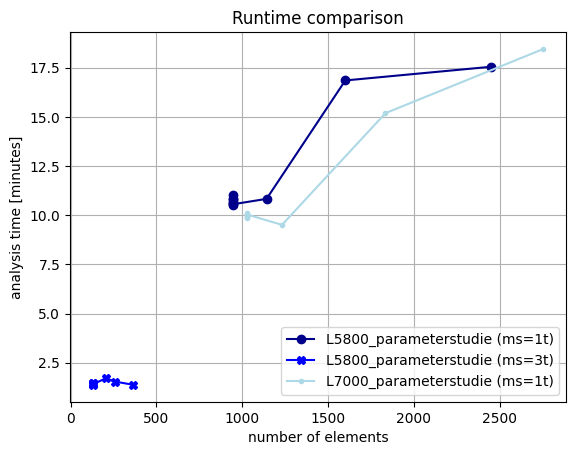

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(n_elements1, analysis_time1,label='L5800_parameterstudie (ms=1t)', marker='o', color='darkblue')
ax.plot(n_elements2, analysis_time2,label='L5800_parameterstudie (ms=3t)', marker='X', color='blue')
ax.plot(n_elements3, analysis_time3,label='L7000_parameterstudie (ms=1t)', marker='.', color='lightblue')


ax.set(xlabel='number of elements', ylabel='analysis time [minutes]',
       title='Runtime comparison')

# ax.set_ylim(bottom=0,top=20)

ax.grid()
ax.legend()

#fig.savefig("test.png")
plt.show()